## 1. Research Questions
This analysis aims to answer the following key questions:
1.	How do air pollution levels (PM2.5, NO₂, O₃) vary across countries and regions globally?
2.	What is the relationship between air pollution and key health outcomes, specifically:
Life expectancy
Mortality rates
Respiratory disease prevalence (if available)
3.	Does GDP per capita moderate the relationship between air pollution and health outcomes?
4.	Which regions show the highest pollution burden, and how does this relate to their health indicators?

## 2.Sources
This project uses datasets from:

| Source                                   | Data Used                                                                                      |
|------------------------------------------|-------------------------------------------------------------------------------------------------|
| WHO Global Health Observatory (GHO)      | Air pollution indicators (PM2.5, NO₂, O₃), country-level health indicators                     |
| World Bank World Development Indicators (WDI) | GDP per capita (PPP), life expectancy, mortality                                              |
| Our World in Data                        | Additional life expectancy measurements                                                        |
| OpenAQ                                   | (Optional) Raw air sensor readings, if needed for deeper analysis                              |




In [1]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the Data sets
air = pd.read_csv("air-quality.csv")
gdp = pd.read_csv("gdp-per-capita-worldbank.csv")
life = pd.read_csv("life-expectancy.csv")

In [3]:
#Inspect the datasets
print("Information on Air Quality dataset.")
air.info()
air.head()


Information on Air Quality dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               9450 non-null   object 
 1   Indicator                   9450 non-null   object 
 2   ValueType                   9450 non-null   object 
 3   ParentLocationCode          9450 non-null   object 
 4   ParentLocation              9450 non-null   object 
 5   Location type               9450 non-null   object 
 6   SpatialDimValueCode         9450 non-null   object 
 7   Location                    9450 non-null   object 
 8   Period type                 9450 non-null   object 
 9   Period                      9450 non-null   int64  
 10  IsLatestYear                9450 non-null   bool   
 11  Dim1 type                   9450 non-null   object 
 12  Dim1                        9450 non-null   object 
 1

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-11T21:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-11T21:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-11T21:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-11T21:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-11T21:00:00.000Z


In [4]:
#Inspect the datasets
print("Information on GDP.")
gdp.info()
gdp.head()


Information on GDP.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 5 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7311 non-null   object 
 1   Code                                                 6876 non-null   object 
 2   Year                                                 7311 non-null   int64  
 3   GDP per capita, PPP (constant 2021 international $)  7236 non-null   float64
 4   World regions according to OWID                      272 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 285.7+ KB


,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2000,1617.8264,NaN
1,Afghanistan,AFG,2001,1454.1108,NaN
2,Afghanistan,AFG,2002,1774.3087,NaN
3,Afghanistan,AFG,2003,1815.9282,NaN
4,Afghanistan,AFG,2004,1776.9182,NaN


In [5]:
#Inspect the datasets
print("Information on Life Expectancy.")
life.info()
life.head()

Information on Life Expectancy.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21565 entries, 0 to 21564
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           21565 non-null  object 
 1   Code                             19609 non-null  object 
 2   Year                             21565 non-null  int64  
 3   Period life expectancy at birth  21565 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 674.0+ KB


,Entity,Code,Year,Period life expectancy at birth
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


In [85]:
#cleaning Air quality dataset
ac= air[["Location", "Period", "Indicator", "FactValueNumeric"]].copy()

In [86]:
#Renaming the columns
ac= air_clean.rename(columns={
    "Location": "Country",
    "Period" : "Year",
    "Indicator" : "Pollutant",
    "FactValueNumeric" : "Value"
})

In [87]:
ac.head()

,Country,Year,Pollutant,Value
0,Kenya,2019,Concentrations of fine particulate matter (PM2.5),10.01
1,Trinidad and Tobago,2019,Concentrations of fine particulate matter (PM2.5),10.02
2,United Kingdom of Great Britain and Northern I...,2019,Concentrations of fine particulate matter (PM2.5),10.06
3,Grenada,2019,Concentrations of fine particulate matter (PM2.5),10.08
4,Brazil,2019,Concentrations of fine particulate matter (PM2.5),10.09


In [88]:
ac.tail()

,Country,Year,Pollutant,Value
9445,Belize,2010,Concentrations of fine particulate matter (PM2.5),9.92
9446,Trinidad and Tobago,2010,Concentrations of fine particulate matter (PM2.5),9.92
9447,Kenya,2010,Concentrations of fine particulate matter (PM2.5),9.94
9448,United States of America,2010,Concentrations of fine particulate matter (PM2.5),9.95
9449,Afghanistan,2010,Concentrations of fine particulate matter (PM2.5),92.79


In [89]:
ac.isna().sum()

Country      0
Year         0
Pollutant    0
Value        0
dtype: int64

In [90]:
#converting year to int
air_clean["Year"] = air_clean["Year"].astype(int)

In [91]:
#transforms long-format data (one pollutant per row) into wide format (one row per country-year with columns for each pollutant).
pm = air_clean.pivot_table(
    index = ["Country", "Year"],
    columns = "Pollutant",
    values = "Value",
    aggfunc = "mean"
).reset_index()

In [92]:
pm.head()

Pollutant,Country,Year,Concentrations of fine particulate matter (PM2.5)
0,Afghanistan,2010,75.274
1,Afghanistan,2011,72.958
2,Afghanistan,2012,74.534
3,Afghanistan,2013,78.902
4,Afghanistan,2014,74.396


In [93]:
gdp.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2021 international $)",World regions according to OWID
0,Afghanistan,AFG,2000,1617.8264,NaN
1,Afghanistan,AFG,2001,1454.1108,NaN
2,Afghanistan,AFG,2002,1774.3087,NaN
3,Afghanistan,AFG,2003,1815.9282,NaN
4,Afghanistan,AFG,2004,1776.9182,NaN


In [94]:
#cleaning for GDP
gc = gdp.rename(columns={
    "Entity": "Country",
    "GDP per capita, PPP (constant 2021 international $)" : "GDP_per_capita"
})

In [95]:
gc = gc[["Country", "Year", "GDP_per_capita"]]

In [96]:
#convert the data type of Year
gc["Year"] = gdp_clean["Year"].astype(int)

In [97]:
gc.head()

,Country,Year,GDP_per_capita
0,Afghanistan,2000.0,1617.8264
1,Afghanistan,2001.0,1454.1108
2,Afghanistan,2002.0,1774.3087
3,Afghanistan,2003.0,1815.9282
4,Afghanistan,2004.0,1776.9182


In [98]:
gc.isnull().sum()

Country            0
Year              75
GDP_per_capita    75
dtype: int64

In [99]:
gc = gdp_clean.dropna(subset=["GDP_per_capita"])

In [100]:
life.head()

,Entity,Code,Year,Period life expectancy at birth
0,Afghanistan,AFG,1950,28.1563
1,Afghanistan,AFG,1951,28.5836
2,Afghanistan,AFG,1952,29.0138
3,Afghanistan,AFG,1953,29.4521
4,Afghanistan,AFG,1954,29.6975


In [101]:
#cleaning for Life
lc = life.rename(columns={
    "Entity": "Country",
    "Period life expectancy at birth": "Life_expectancy"
})


In [102]:
lc = life_clean[["Country", "Year", "Life_expectancy"]].copy()

In [103]:
lc.head()

,Country,Year,Life_expectancy
0,Afghanistan,1950,28.1563
1,Afghanistan,1951,28.5836
2,Afghanistan,1952,29.0138
3,Afghanistan,1953,29.4521
4,Afghanistan,1954,29.6975


In [104]:
lc["Year"] = lc["Year"].astype(int)

In [105]:
lc.isnull().sum()

Country            0
Year               0
Life_expectancy    0
dtype: int64

In [106]:
#Merge the datasets
df = pm.merge(gc, on=["Country", "Year"], how="inner")

In [107]:
df.shape

(1667, 4)

In [108]:
df.head()

,Country,Year,Concentrations of fine particulate matter (PM2.5),GDP_per_capita
0,Afghanistan,2010,75.274,2848.5862
1,Afghanistan,2011,72.958,2757.0525
2,Afghanistan,2012,74.534,2985.3190
3,Afghanistan,2013,78.902,3046.5798
4,Afghanistan,2014,74.396,3017.9426


In [109]:
master = merged.merge(life_clean, on=["Country", "Year"], how="inner")

In [110]:
master.shape

(1667, 5)

In [111]:
master.head()

,Country,Year,Concentrations of fine particulate matter (PM2.5),GDP_per_capita,Life_expectancy
0,Afghanistan,2010,75.274,2848.5862,60.7018
1,Afghanistan,2011,72.958,2757.0525,61.2503
2,Afghanistan,2012,74.534,2985.3190,61.7349
3,Afghanistan,2013,78.902,3046.5798,62.1878
4,Afghanistan,2014,74.396,3017.9426,62.2599


In [112]:
#Save the dataset
master.to_csv("master_dataset.csv", index=False)


In [113]:
master.head()

,Country,Year,Concentrations of fine particulate matter (PM2.5),GDP_per_capita,Life_expectancy
0,Afghanistan,2010,75.274,2848.5862,60.7018
1,Afghanistan,2011,72.958,2757.0525,61.2503
2,Afghanistan,2012,74.534,2985.3190,61.7349
3,Afghanistan,2013,78.902,3046.5798,62.1878
4,Afghanistan,2014,74.396,3017.9426,62.2599


In [114]:
master.isnull().sum()

Country                                              0
Year                                                 0
Concentrations of fine particulate matter (PM2.5)    0
GDP_per_capita                                       0
Life_expectancy                                      0
dtype: int64

In [115]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 5 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            1667 non-null   object 
 1   Year                                               1667 non-null   int64  
 2   Concentrations of fine particulate matter (PM2.5)  1667 non-null   float64
 3   GDP_per_capita                                     1667 non-null   float64
 4   Life_expectancy                                    1667 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 65.2+ KB


In [116]:
master.describe()

,Year,Concentrations of fine particulate matter (PM2.5),GDP_per_capita,Life_expectancy
count,1667.000000,1667.000000,1667.000000,1667.000000
mean,2014.506299,23.502004,22362.302269,71.114769
std,2.871674,15.298666,23420.286463,8.411066
min,2010.000000,4.914000,855.732700,31.530200
25%,2012.000000,11.681750,5101.856950,65.111950
50%,2015.000000,18.536000,14555.188000,72.188200
75%,2017.000000,32.048000,31145.750000,77.285450
max,2019.000000,78.902000,145591.020000,85.256500


## Visualization

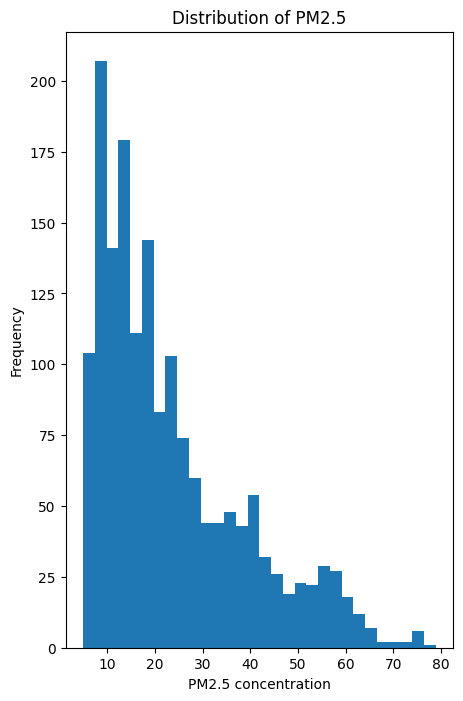

In [118]:
#Histogram of PM2.5
plt.figure(figsize=(5,8))
plt.hist(master["Concentrations of fine particulate matter (PM2.5)"], bins=30)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5 concentration')
plt.ylabel('Frequency')
plt.show()

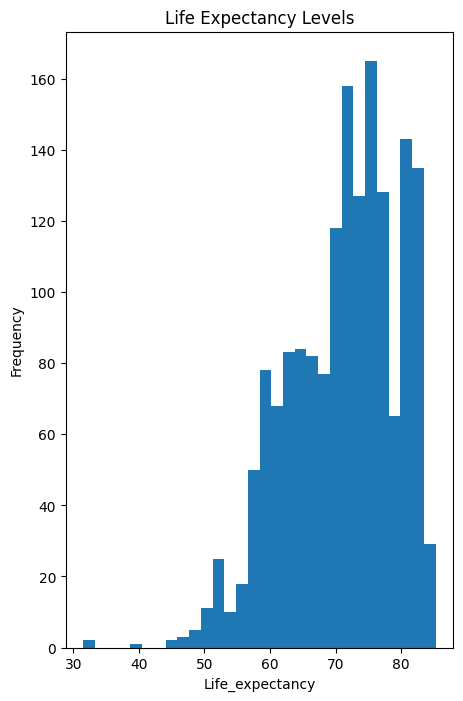

In [119]:
# Histogram of life expectancy
plt.figure(figsize=(5,8))
plt.hist(master["Life_expectancy"], bins=30)
plt.title('Life Expectancy Levels')
plt.xlabel('Life_expectancy')
plt.ylabel('Frequency')
plt.show()


In [40]:
region_mapping = {
    # --- South Asia ---
    'Afghanistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Bhutan': 'South Asia',
    'India': 'South Asia',
    'Maldives': 'South Asia',
    'Nepal': 'South Asia',
    'Pakistan': 'South Asia',
    'Sri Lanka': 'South Asia',

    # --- Europe & Central Asia ---
    'Albania': 'Europe & Central Asia',
    'Andorra': 'Europe & Central Asia',
    'Armenia': 'Europe & Central Asia',
    'Austria': 'Europe & Central Asia',
    'Azerbaijan': 'Europe & Central Asia',
    'Belarus': 'Europe & Central Asia',
    'Belgium': 'Europe & Central Asia',
    'Bosnia and Herzegovina': 'Europe & Central Asia',
    'Bulgaria': 'Europe & Central Asia',
    'Croatia': 'Europe & Central Asia',
    'Cyprus': 'Europe & Central Asia',
    'Czech Republic': 'Europe & Central Asia',
    'Denmark': 'Europe & Central Asia',
    'Estonia': 'Europe & Central Asia',
    'Finland': 'Europe & Central Asia',
    'France': 'Europe & Central Asia',
    'Georgia': 'Europe & Central Asia',
    'Germany': 'Europe & Central Asia',
    'Greece': 'Europe & Central Asia',
    'Hungary': 'Europe & Central Asia',
    'Iceland': 'Europe & Central Asia',
    'Ireland': 'Europe & Central Asia',
    'Italy': 'Europe & Central Asia',
    'Kazakhstan': 'Europe & Central Asia',
    'Kyrgyzstan': 'Europe & Central Asia',
    'Latvia': 'Europe & Central Asia',
    'Liechtenstein': 'Europe & Central Asia',
    'Lithuania': 'Europe & Central Asia',
    'Luxembourg': 'Europe & Central Asia',
    'Malta': 'Europe & Central Asia',
    'Moldova': 'Europe & Central Asia',
    'Monaco': 'Europe & Central Asia',
    'Montenegro': 'Europe & Central Asia',
    'Netherlands': 'Europe & Central Asia',
    'North Macedonia': 'Europe & Central Asia',
    'Norway': 'Europe & Central Asia',
    'Poland': 'Europe & Central Asia',
    'Portugal': 'Europe & Central Asia',
    'Romania': 'Europe & Central Asia',
    'Russia': 'Europe & Central Asia',
    'San Marino': 'Europe & Central Asia',
    'Serbia': 'Europe & Central Asia',
    'Slovakia': 'Europe & Central Asia',
    'Slovenia': 'Europe & Central Asia',
    'Spain': 'Europe & Central Asia',
    'Sweden': 'Europe & Central Asia',
    'Switzerland': 'Europe & Central Asia',
    'Tajikistan': 'Europe & Central Asia',
    'Turkmenistan': 'Europe & Central Asia',
    'Ukraine': 'Europe & Central Asia',
    'United Kingdom': 'Europe & Central Asia',
    'Uzbekistan': 'Europe & Central Asia',

    # --- Middle East & North Africa (MENA) ---
    'Algeria': 'Middle East & North Africa',
    'Bahrain': 'Middle East & North Africa',
    'Egypt': 'Middle East & North Africa',
    'Iran': 'Middle East & North Africa',
    'Iraq': 'Middle East & North Africa',
    'Jordan': 'Middle East & North Africa',
    'Kuwait': 'Middle East & North Africa',
    'Lebanon': 'Middle East & North Africa',
    'Libya': 'Middle East & North Africa',
    'Morocco': 'Middle East & North Africa',
    'Oman': 'Middle East & North Africa',
    'Qatar': 'Middle East & North Africa',
    'Saudi Arabia': 'Middle East & North Africa',
    'Syria': 'Middle East & North Africa',
    'Tunisia': 'Middle East & North Africa',
    'United Arab Emirates': 'Middle East & North Africa',
    'Yemen': 'Middle East & North Africa',

    # --- Sub-Saharan Africa ---
    'Angola': 'Sub-Saharan Africa',
    'Benin': 'Sub-Saharan Africa',
    'Botswana': 'Sub-Saharan Africa',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Cape Verde': 'Sub-Saharan Africa',
    'Cameroon': 'Sub-Saharan Africa',
    'Central African Republic': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'Comoros': 'Sub-Saharan Africa',
    'Congo': 'Sub-Saharan Africa',
    'Congo, Democratic Republic': 'Sub-Saharan Africa',
    'Djibouti': 'Sub-Saharan Africa',
    'Equatorial Guinea': 'Sub-Saharan Africa',
    'Eritrea': 'Sub-Saharan Africa',
    'Eswatini': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Gabon': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Ghana': 'Sub-Saharan Africa',
    'Guinea': 'Sub-Saharan Africa',
    'Guinea-Bissau': 'Sub-Saharan Africa',
    'Ivory Coast': 'Sub-Saharan Africa',
    'Kenya': 'Sub-Saharan Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Mali': 'Sub-Saharan Africa',
    'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'Rwanda': 'Sub-Saharan Africa',
    'Sao Tome and Principe': 'Sub-Saharan Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Seychelles': 'Sub-Saharan Africa',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Somalia': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Tanzania': 'Sub-Saharan Africa',
    'Togo': 'Sub-Saharan Africa',
    'Uganda': 'Sub-Saharan Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa',

    # --- East Asia & Pacific ---
    'Australia': 'East Asia & Pacific',
    'Brunei': 'East Asia & Pacific',
    'Cambodia': 'East Asia & Pacific',
    'China': 'East Asia & Pacific',
    'Fiji': 'East Asia & Pacific',
    'Indonesia': 'East Asia & Pacific',
    'Japan': 'East Asia & Pacific',
    'Kiribati': 'East Asia & Pacific',
    'Laos': 'East Asia & Pacific',
    'Malaysia': 'East Asia & Pacific',
    'Mongolia': 'East Asia & Pacific',
    'Myanmar': 'East Asia & Pacific',
    'New Zealand': 'East Asia & Pacific',
    'Papua New Guinea': 'East Asia & Pacific',
    'Philippines': 'East Asia & Pacific',
    'Singapore': 'East Asia & Pacific',
    'Solomon Islands': 'East Asia & Pacific',
    'South Korea': 'East Asia & Pacific',
    'Thailand': 'East Asia & Pacific',
    'Timor-Leste': 'East Asia & Pacific',
    'Tonga': 'East Asia & Pacific',
    'Tuvalu': 'East Asia & Pacific',
    'Vanuatu': 'East Asia & Pacific',
    'Vietnam': 'East Asia & Pacific',

    # --- Latin America & Caribbean ---
    'Antigua and Barbuda': 'Latin America & Caribbean',
    'Argentina': 'Latin America & Caribbean',
    'Bahamas': 'Latin America & Caribbean',
    'Barbados': 'Latin America & Caribbean',
    'Belize': 'Latin America & Caribbean',
    'Bolivia': 'Latin America & Caribbean',
    'Brazil': 'Latin America & Caribbean',
    'Chile': 'Latin America & Caribbean',
    'Colombia': 'Latin America & Caribbean',
    'Costa Rica': 'Latin America & Caribbean',
    'Cuba': 'Latin America & Caribbean',
    'Dominica': 'Latin America & Caribbean',
    'Dominican Republic': 'Latin America & Caribbean',
    'Ecuador': 'Latin America & Caribbean',
    'El Salvador': 'Latin America & Caribbean',
    'Grenada': 'Latin America & Caribbean',
    'Guatemala': 'Latin America & Caribbean',
    'Guyana': 'Latin America & Caribbean',
    'Haiti': 'Latin America & Caribbean',
    'Honduras': 'Latin America & Caribbean',
    'Jamaica': 'Latin America & Caribbean',
    'Mexico': 'Latin America & Caribbean',
    'Nicaragua': 'Latin America & Caribbean',
    'Panama': 'Latin America & Caribbean',
    'Paraguay': 'Latin America & Caribbean',
    'Peru': 'Latin America & Caribbean',
    'Saint Kitts and Nevis': 'Latin America & Caribbean',
    'Saint Lucia': 'Latin America & Caribbean',
    'Saint Vincent and the Grenadines': 'Latin America & Caribbean',
    'Suriname': 'Latin America & Caribbean',
    'Trinidad and Tobago': 'Latin America & Caribbean',
    'Uruguay': 'Latin America & Caribbean',
    'Venezuela': 'Latin America & Caribbean',
}


In [120]:
master["Region"] = master["Country"].map(region_mapping)

In [121]:
master.head()

,Country,Year,Concentrations of fine particulate matter (PM2.5),GDP_per_capita,Life_expectancy,Region
0,Afghanistan,2010,75.274,2848.5862,60.7018,South Asia
1,Afghanistan,2011,72.958,2757.0525,61.2503,South Asia
2,Afghanistan,2012,74.534,2985.3190,61.7349,South Asia
3,Afghanistan,2013,78.902,3046.5798,62.1878,South Asia
4,Afghanistan,2014,74.396,3017.9426,62.2599,South Asia


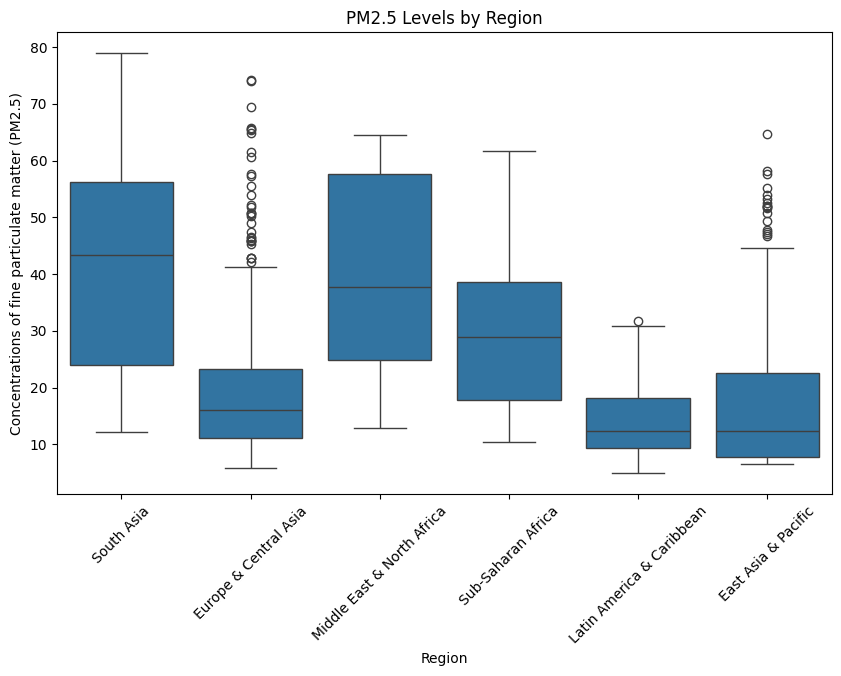

In [122]:
#Compare Regions
plt.figure(figsize=(10,6))
sns.boxplot(data=master, x='Region', y='Concentrations of fine particulate matter (PM2.5)')
plt.xticks(rotation=45)
plt.title('PM2.5 Levels by Region')
plt.show()

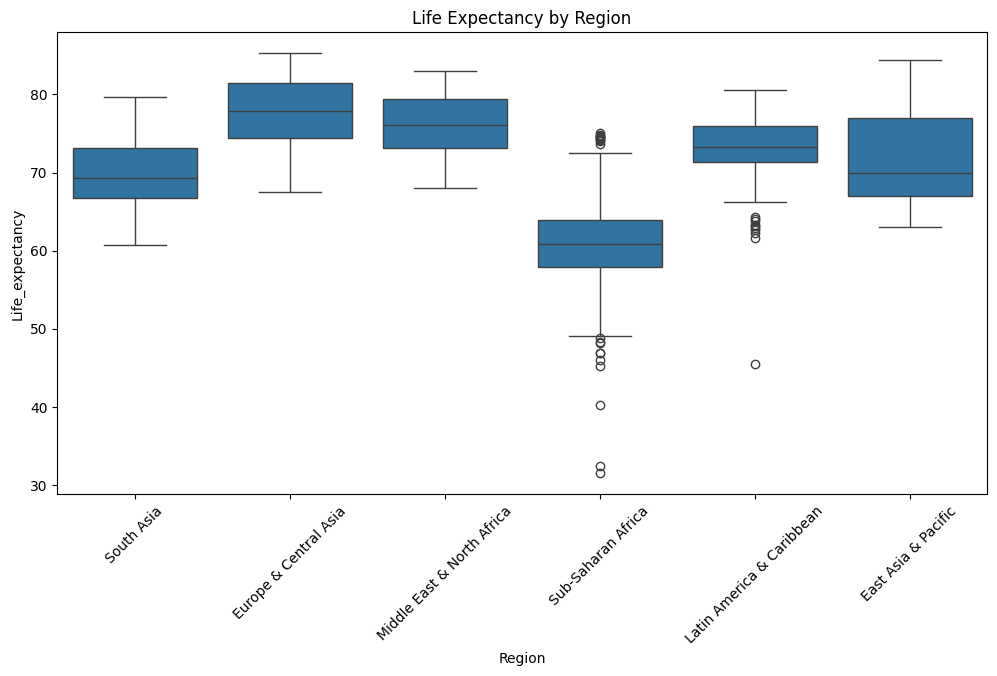

In [123]:

#Life Expectancy by Region
plt.figure(figsize=(12,6))
sns.boxplot(data=master, x='Region', y='Life_expectancy')
plt.xticks(rotation=45)
plt.title('Life Expectancy by Region')
plt.show()

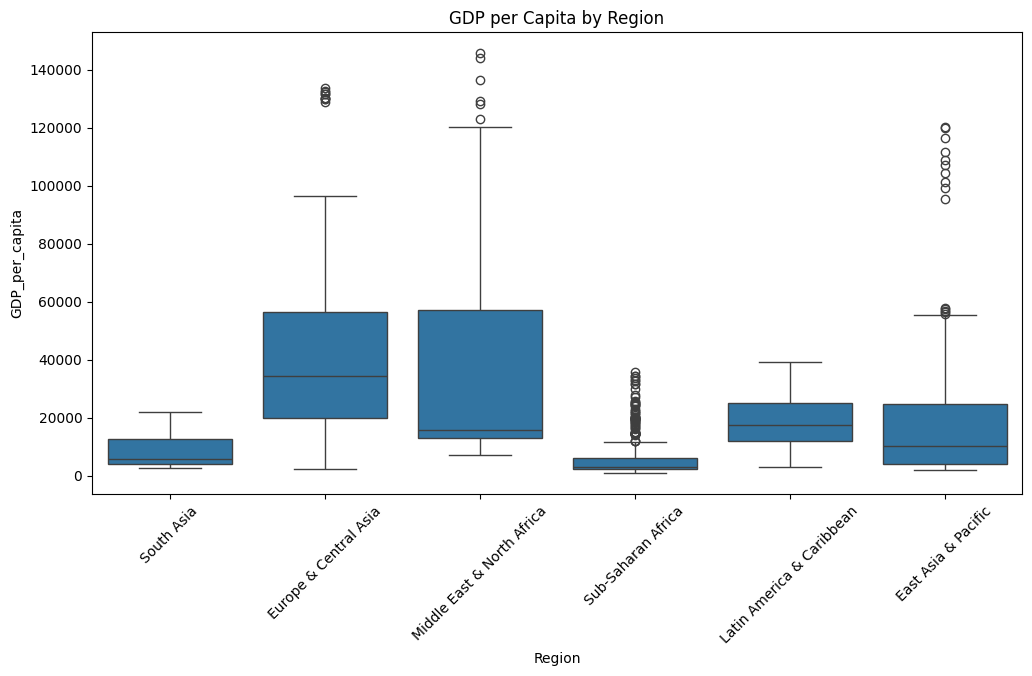

In [124]:
#GDP per Capita by Region
plt.figure(figsize=(12,6))
sns.boxplot(data=master, x='Region', y='GDP_per_capita')
plt.xticks(rotation=45)
plt.title('GDP per Capita by Region')
plt.show()

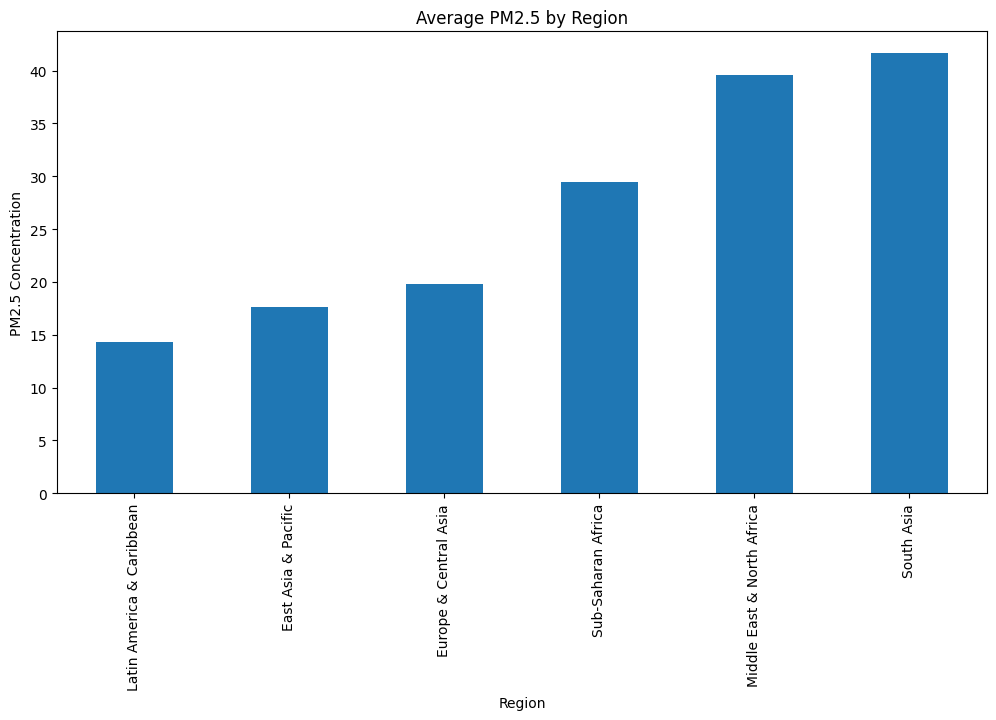

In [125]:
#Average PM2.5 by Region

regional_pm25 = master.groupby('Region')['Concentrations of fine particulate matter (PM2.5)'].mean().sort_values()

plt.figure(figsize=(12,6))
regional_pm25.plot(kind='bar')
plt.title('Average PM2.5 by Region')
plt.ylabel('PM2.5 Concentration')
plt.show()


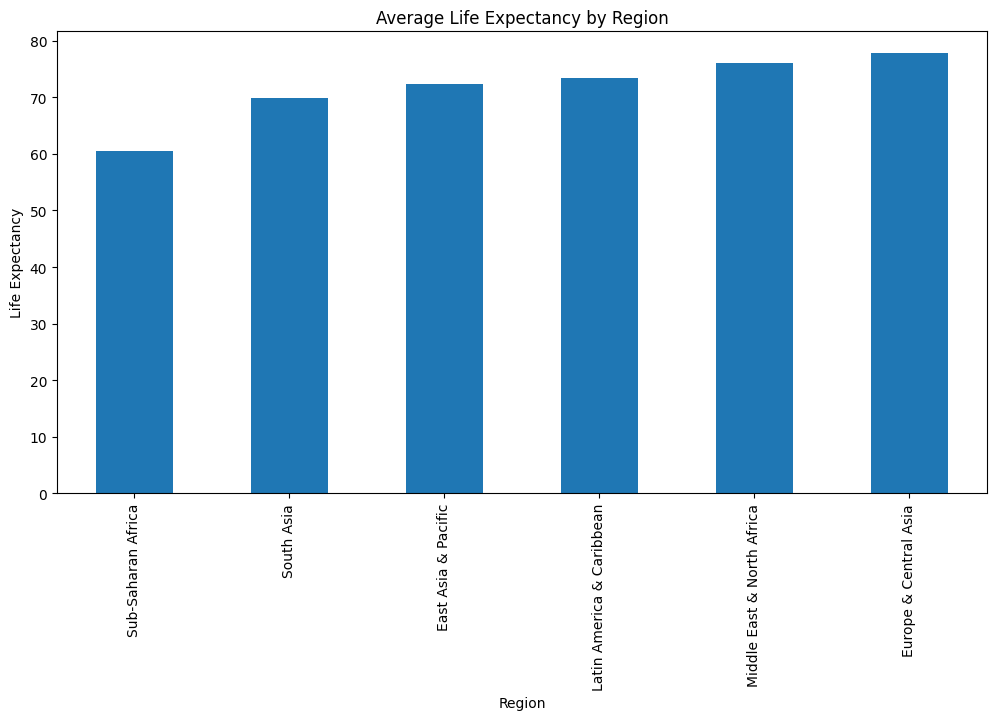

In [126]:

#Average Life Expectancy by Region

regional_life = master.groupby('Region')['Life_expectancy'].mean().sort_values()

plt.figure(figsize=(12,6))
regional_life.plot(kind='bar')
plt.title('Average Life Expectancy by Region')
plt.ylabel('Life Expectancy')
plt.show()

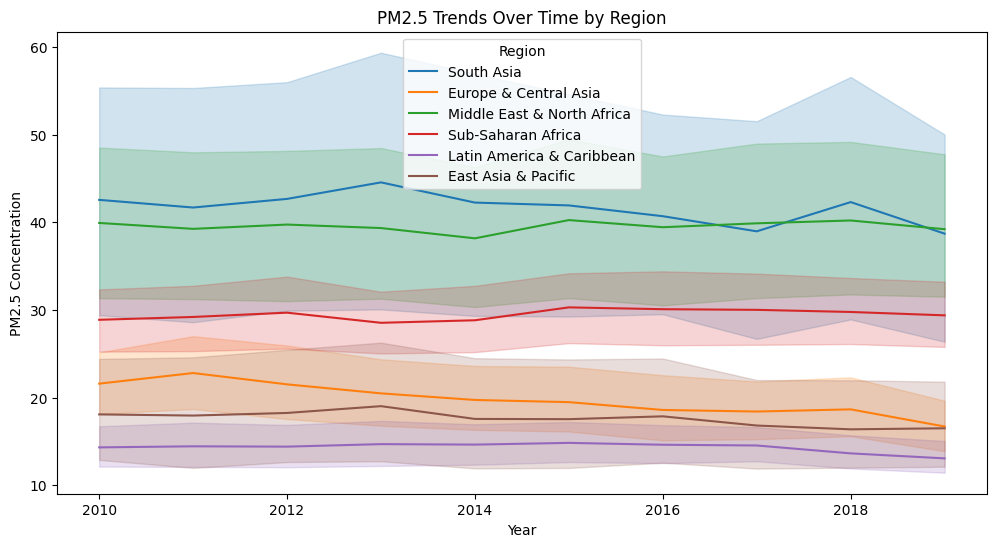

In [127]:

#PM2.5 Trend Over Time by Region 
#is increasing or decreasing in each region
plt.figure(figsize=(12,6))
sns.lineplot(data=master, x='Year',
             y='Concentrations of fine particulate matter (PM2.5)',
             hue='Region')
plt.title('PM2.5 Trends Over Time by Region')
plt.ylabel('PM2.5 Concentration')
plt.show()

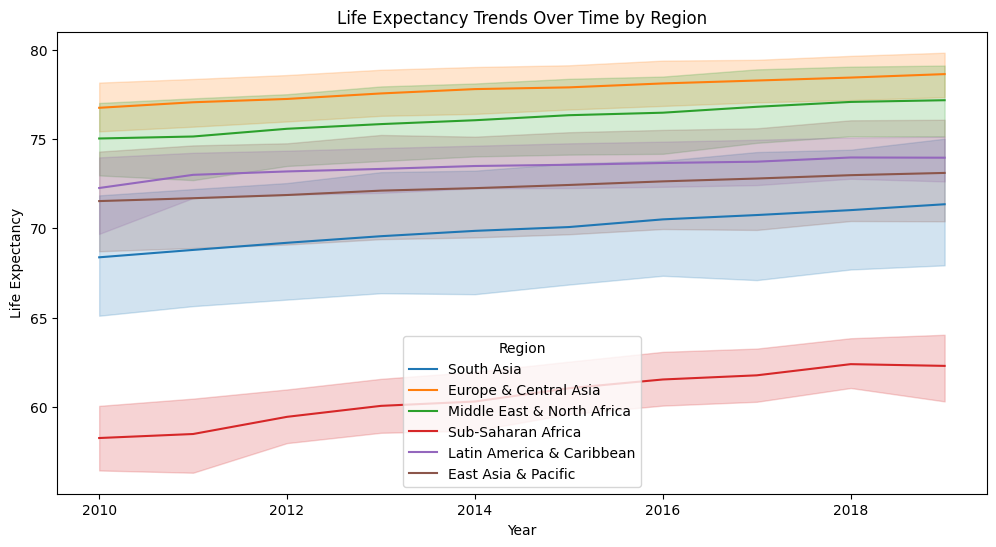

In [128]:
#Life Expectancy Trend Over Time by Region
#Rising life expectancy in most regions
plt.figure(figsize=(12,6))
sns.lineplot(data=master, x='Year', y='Life_expectancy', hue='Region')
plt.title('Life Expectancy Trends Over Time by Region')
plt.ylabel('Life Expectancy')
plt.show()


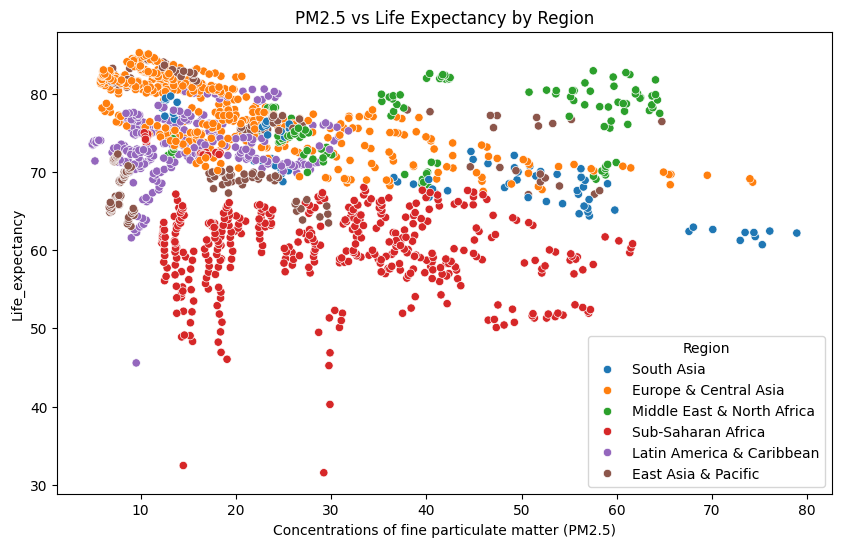

In [129]:
#PM2.5 vs Life Expectancy
plt.figure(figsize=(10,6))
sns.scatterplot(data=master,
                x='Concentrations of fine particulate matter (PM2.5)',
                y='Life_expectancy',
                hue='Region')
plt.title('PM2.5 vs Life Expectancy by Region')
plt.show()


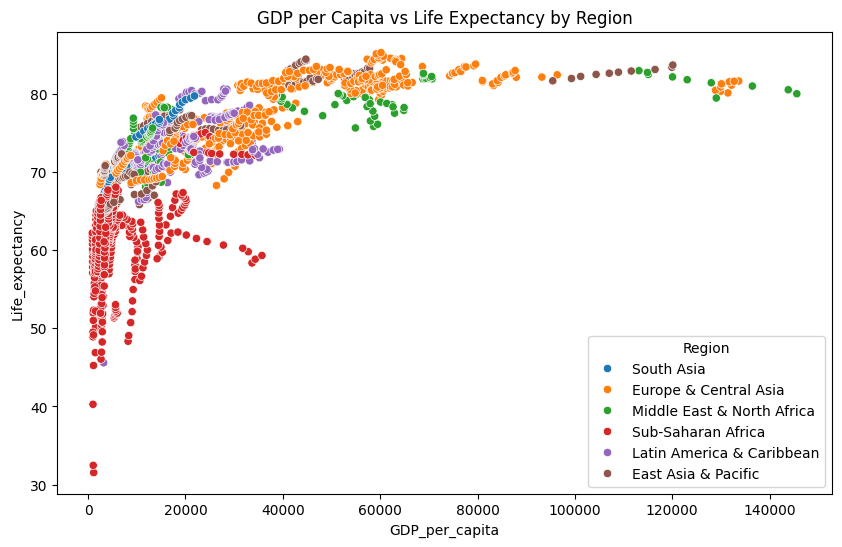

In [130]:
#GDP per Capita vs Life Expectancy

plt.figure(figsize=(10,6))
sns.scatterplot(data=master, x='GDP_per_capita', y='Life_expectancy', hue='Region')
plt.title('GDP per Capita vs Life Expectancy by Region')
plt.show()


In [131]:
#DESCRIPTIVE STATISTICS

In [132]:
master.head()

,Country,Year,Concentrations of fine particulate matter (PM2.5),GDP_per_capita,Life_expectancy,Region
0,Afghanistan,2010,75.274,2848.5862,60.7018,South Asia
1,Afghanistan,2011,72.958,2757.0525,61.2503,South Asia
2,Afghanistan,2012,74.534,2985.3190,61.7349,South Asia
3,Afghanistan,2013,78.902,3046.5798,62.1878,South Asia
4,Afghanistan,2014,74.396,3017.9426,62.2599,South Asia


In [133]:
#Most popullated region
master.groupby('Region')['Concentrations of fine particulate matter (PM2.5)'].mean()


Region
East Asia & Pacific           17.590145
Europe & Central Asia         19.790139
Latin America & Caribbean     14.312207
Middle East & North Africa    39.539357
South Asia                    41.629006
Sub-Saharan Africa            29.463385
Name: Concentrations of fine particulate matter (PM2.5), dtype: float64

In [134]:
#REGIONAL SUMMARY
master.groupby("Region")["Life_expectancy"].mean()

Region
East Asia & Pacific           72.331263
Europe & Central Asia         77.765872
Latin America & Caribbean     73.406710
Middle East & North Africa    76.141451
South Asia                    69.943206
Sub-Saharan Africa            60.578456
Name: Life_expectancy, dtype: float64

In [135]:
#REGIONAL SUMMARY
master.groupby("Region")["GDP_per_capita"].mean()

Region
East Asia & Pacific           20444.019165
Europe & Central Asia         39072.048678
Latin America & Caribbean     18432.420649
Middle East & North Africa    36687.966071
South Asia                     8384.567822
Sub-Saharan Africa             6172.144633
Name: GDP_per_capita, dtype: float64

In [136]:
#FULL SUMMARY TABLE
regional_stats = master.groupby('Region').agg({
    "Concentrations of fine particulate matter (PM2.5)": ["mean", "median", "std"],
    "Life_expectancy": ["mean", "median", "std"],
    "GDP_per_capita": ["mean", "median", "std"]
})

regional_stats


Concentrations of fine particulate matter (PM2.5)  \
                                                                        mean   
Region                                                                         
East Asia & Pacific                                                17.590145   
Europe & Central Asia                                              19.790139   
Latin America & Caribbean                                          14.312207   
Middle East & North Africa                                         39.539357   
South Asia                                                         41.629006   
Sub-Saharan Africa                                                 29.463385   

                                              Life_expectancy            \
                            median        std            mean    median   
Region                                                                    
East Asia & Pacific         12.342  13.398781       72.331263  69.97340   
Europe & Central Asia       15.988  12.757797       77.765872  77.93190   
Latin America & Caribbean   12.302   6.316123       73.406710  73.23595   
Middle East & North Africa  37.672  16.415297       76.141451  76.08020   
South Asia                  43.457  19.173976       69.943206  69.31260   
Sub-Saharan Africa          28.872  12.957568       60.578456  60.90550   

                                     GDP_per_capita                             
                                 std           mean       median           std  
Region                                                                          
East Asia & Pacific         6.389243   20444.019165  10144.58200  25979.398202  
Europe & Central Asia       4.412348   39072.048678  34503.18550  24719.838732  
Latin America & Caribbean   3.792093   18432.420649  17397.60350   8328.246242  
Middle East & North Africa  4.006810   36687.966071  15894.07500  33077.961880  
South Asia                  5.003255    8384.567822   5707.38865   5445.132179  
Sub-Saharan Africa          5.708384    6172.144633   3127.53960   6969.342734

In [137]:
regional_stats.round(2)

Concentrations of fine particulate matter (PM2.5)  \
                                                                        mean   
Region                                                                         
East Asia & Pacific                                                    17.59   
Europe & Central Asia                                                  19.79   
Latin America & Caribbean                                              14.31   
Middle East & North Africa                                             39.54   
South Asia                                                             41.63   
Sub-Saharan Africa                                                     29.46   

                                         Life_expectancy               \
                           median    std            mean median   std   
Region                                                                  
East Asia & Pacific         12.34  13.40           72.33  69.97  6.39   
Europe & Central Asia       15.99  12.76           77.77  77.93  4.41   
Latin America & Caribbean   12.30   6.32           73.41  73.24  3.79   
Middle East & North Africa  37.67  16.42           76.14  76.08  4.01   
South Asia                  43.46  19.17           69.94  69.31  5.00   
Sub-Saharan Africa          28.87  12.96           60.58  60.91  5.71   

                           GDP_per_capita                      
                                     mean    median       std  
Region                                                         
East Asia & Pacific              20444.02  10144.58  25979.40  
Europe & Central Asia            39072.05  34503.19  24719.84  
Latin America & Caribbean        18432.42  17397.60   8328.25  
Middle East & North Africa       36687.97  15894.08  33077.96  
South Asia                        8384.57   5707.39   5445.13  
Sub-Saharan Africa                6172.14   3127.54   6969.34

In [138]:
#CORRELATION ANALYSIS

corr = master[['Concentrations of fine particulate matter (PM2.5)',
           'Life_expectancy',
           'GDP_per_capita']].corr()

corr


,Concentrations of fine particulate matter (PM2.5),Life_expectancy,GDP_per_capita
Concentrations of fine particulate matter (PM2.5),1.000000,-0.305656,-0.203860
Life_expectancy,-0.305656,1.000000,0.706231
GDP_per_capita,-0.203860,0.706231,1.000000


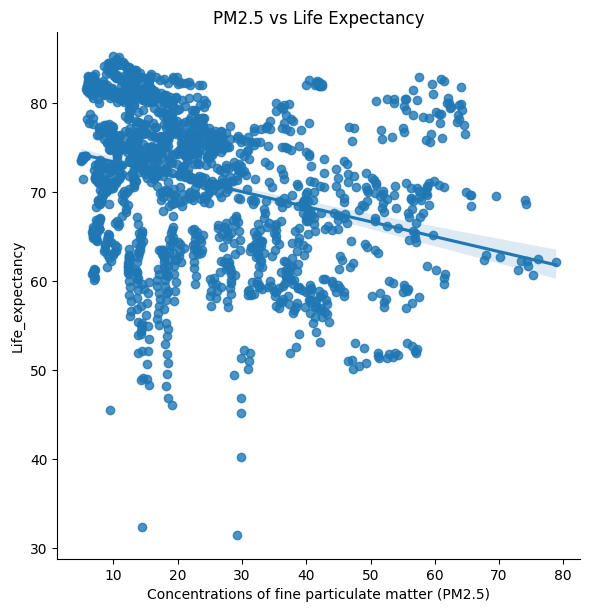

In [139]:
#Scatterplot with Best Fit Line
#This visually shows the relationship.
sns.lmplot(
    data=master,
    x='Concentrations of fine particulate matter (PM2.5)',
    y='Life_expectancy',
    height=6
)
plt.title('PM2.5 vs Life Expectancy')
plt.show()


In [140]:
#LINEAR REGRESSION
import statsmodels.api as sm

X = master['Concentrations of fine particulate matter (PM2.5)']
y = master['Life_expectancy']

X = sm.add_constant(X)  # add intercept

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           2.20e-37
Time:                        10:41:03   Log-Likelihood:                -5833.1
No. Observations:                1667   AIC:                         1.167e+04
Df Residuals:                    1665   BIC:                         1.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                75.0642      0.360    208.670      0.000      74.359      75.770
Concentrations of fine particulate matter (PM2.5)    -0.1680      0.013    -13.099      0.000      -0.193      -0.143
==============================================================================
Omnibus:                       96.523   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.629
Skew:                          -0.608   Prob(JB):                     3.49e-25
Kurtosis:                       3.378   Cond. No.                         51.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#MULTIPLE REGRESSION (PM2.5 + GDP)
X = master[['Concentrations of fine particulate matter (PM2.5)', 'GDP_per_capita']]
y = master['Life_expectancy']

X = sm.add_constant(X)

model2 = sm.OLS(y, X).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     923.4
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          1.66e-270
Time:                        10:41:03   Log-Likelihood:                -5292.5
No. Observations:                1667   AIC:                         1.059e+04
Df Residuals:                    1664   BIC:                         1.061e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                67.8989      0.319    213.125      0.000      67.274      68.524
Concentrations of fine particulate matter (PM2.5)    -0.0927      0.009     -9.786      0.000      -0.111      -0.074
GDP_per_capita                                        0.0002   6.19e-06     38.972      0.000       0.000       0.000
==============================================================================
Omnibus:                      331.640   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              679.161
Skew:                          -1.154   Prob(JB):                    3.33e-148
Kurtosis:                       5.110   Cond. No.                     7.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""